# Summary

### In this notebook we evaluate all embedding types using Representational Similarity Analysis (RSA) with a focus on determining whether stereotypes align towards a concept of race. The goal is to evaluate for less similarity for any stereotype towards race (with higher values indicating more bias). This notebook adapts the work found in https://github.com/mlepori1/Unequal_Representations

###  <span style="color:red"> This notebook requires generated-hard-debias.w2v and generated-double-hard-debias.w2v data files. Please ensure to execute [double-hard-debias](https://github.com/YolandaMDavis/DoubleHardMulticlass/blob/main/double-hard-debias.ipynb) to generate these files before proceeding </span>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import string 
from common.rsaUtils import get_RSA3 

%matplotlib inline

In [2]:
import os
curr_dr = os.getcwd() 

## Biased embeddings RSA scores

#### Word2Vec

In [3]:
w2v_biased =  get_RSA3(curr_dr+'/data/Word_Data_race.xlsx', 
        curr_dr  + "/data/data_vocab_race_pre_trained.w2v", 50)

White_Concept
word idx matrices created
matrices created
embeds generated
RSA White_Stereotypes White_Concept: 0.12601123664187192 STD: 0.09348660582236677
RSA Asian_Stereotypes White_Concept: -0.06747908920061463 STD: 0.05865025172258091
RSA Black_Stereotypes White_Concept: 0.08413958253825685 STD: 0.07410624345422678
Sign Test White_Stereotypes vs. Asian_Stereotypes: 3.773842968353187e-21
Sign Test White_Stereotypes vs. Black_Stereotypes: 0.0035176417229701587
Sign Test Black_Stereotypes vs. Asian_Stereotypes: 2.726143732806038e-20

Asian_Concept
word idx matrices created
matrices created
embeds generated
RSA White_Stereotypes Asian_Concept: 0.11285499997788055 STD: 0.053854030028731854
RSA Asian_Stereotypes Asian_Concept: 0.034090018161897724 STD: 0.034212804230316106
RSA Black_Stereotypes Asian_Concept: 0.06243847465273546 STD: 0.06240921929979027
Sign Test White_Stereotypes vs. Asian_Stereotypes: 3.369757074208766e-15
Sign Test White_Stereotypes vs. Black_Stereotypes: 0.0004087771

## Hard Debiased embeddings RSA scores

#### Word2Vec

In [4]:
w2v_hd_final = get_RSA3( curr_dr + '/data/Word_Data_race.xlsx', 
        curr_dr + "/data/generated-hard-debias.w2v", 50)

White_Concept
word idx matrices created
matrices created
embeds generated
RSA White_Stereotypes White_Concept: 0.1238289937697884 STD: 0.0781087846403179
RSA Asian_Stereotypes White_Concept: -0.08950868443678434 STD: 0.05774204126070536
RSA Black_Stereotypes White_Concept: 0.027468726754635787 STD: 0.0696262198509664
Sign Test White_Stereotypes vs. Asian_Stereotypes: 1.5777218104420236e-30
Sign Test White_Stereotypes vs. Black_Stereotypes: 6.147806615047975e-11
Sign Test Black_Stereotypes vs. Asian_Stereotypes: 1.5777218104420236e-30

Asian_Concept
word idx matrices created
matrices created
embeds generated
RSA White_Stereotypes Asian_Concept: 0.0658219213552297 STD: 0.04621228338515963
RSA Asian_Stereotypes Asian_Concept: -0.038843174438145577 STD: 0.044599244424689384
RSA Black_Stereotypes Asian_Concept: 0.05526282925496189 STD: 0.05223092262577145
Sign Test White_Stereotypes vs. Asian_Stereotypes: 1.5777218104420236e-30
Sign Test White_Stereotypes vs. Black_Stereotypes: 0.4841184136

### Double Hard Debiased embeddings RSA scores

#### Word2Vec

In [5]:
w2v_dhd_final = get_RSA3(curr_dr + '/data/Word_Data_race.xlsx', 
        curr_dr + "/data/generated-double-hard-debias.w2v", 50)

White_Concept
word idx matrices created
matrices created
embeds generated
RSA White_Stereotypes White_Concept: 0.12041966836613853 STD: 0.07202666801005596
RSA Asian_Stereotypes White_Concept: -0.05954790583889318 STD: 0.05301651986119019
RSA Black_Stereotypes White_Concept: 0.03050288123934338 STD: 0.07036879590492297
Sign Test White_Stereotypes vs. Asian_Stereotypes: 2.630866896130179e-25
Sign Test White_Stereotypes vs. Black_Stereotypes: 1.1159089057251951e-09
Sign Test Black_Stereotypes vs. Asian_Stereotypes: 6.449688895763542e-24

Asian_Concept
word idx matrices created
matrices created
embeds generated
RSA White_Stereotypes Asian_Concept: 0.04954144238510562 STD: 0.04572377409771119
RSA Asian_Stereotypes Asian_Concept: -0.050014593939698336 STD: 0.048768941238145215
RSA Black_Stereotypes Asian_Concept: 0.041284110019298534 STD: 0.057110317005899185
Sign Test White_Stereotypes vs. Asian_Stereotypes: 3.1554436208840472e-30
Sign Test White_Stereotypes vs. Black_Stereotypes: 0.368201

## Visualizations

In [6]:
results = []
for lis in w2v_biased: 
    lis.append(lis[1][0]+"S_"+lis[2][0]+"C")
    lis.append("Biased")
    results.append(lis)
for lis in w2v_hd_final: 
    lis.append(lis[1][0]+"S_"+lis[2][0]+"C")
    lis.append("Hard Debiased")
    results.append(lis)
for lis in w2v_dhd_final: 
    lis.append(lis[1][0]+"S_"+lis[2][0]+"C")
    lis.append("Double Hard Debiased")
    results.append(lis)

In [7]:
import pandas as pd
df = pd.DataFrame(results,
                       columns=['RSA', 'Stereotypes', 'Concept', 'Stereotypes and Concept', 'Embedding' ])

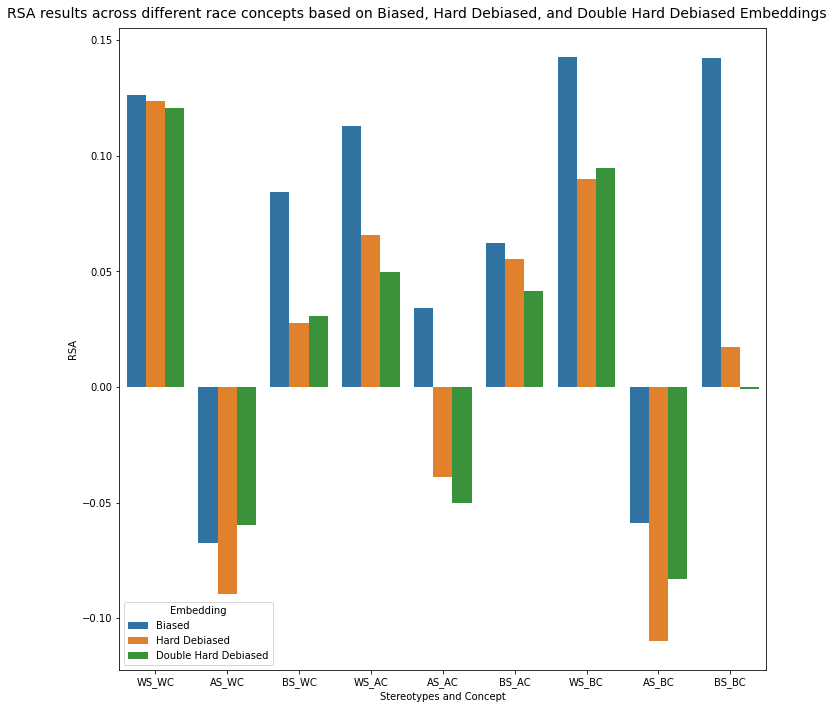

In [8]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
plt.suptitle(
    "RSA results across different race concepts based on Biased, Hard Debiased, and Double Hard Debiased Embeddings",
    fontsize=14,
)
ax = sns.barplot(x="Stereotypes and Concept", y="RSA", hue="Embedding", data=df)
plt.tight_layout()
plt.show()